`April 13, 2022`

### **Univariate Time Series Exercise (ARIMA)**

**Use air passengers dataset**

- Check the stationarity of the data. 
- Do differencing if it is not stationarity. 
- Validate stationarity with the AdFuller test.
- Find the best ARIMA model through ACF & PACF plots.
- Build the model and do forecasting for one year period ahead.
- Plot the forecasting result (you can use any tools).

<hr>

### **Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from datetime import datetime

import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('air_passengers.csv')
df

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121
...,...,...
139,8/1/1960,606
140,9/1/1960,508
141,10/1/1960,461
142,11/1/1960,390


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TravelDate  144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df = df.rename(columns={'TravelDate': 'Date'})

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['Date'] = df['Date'].dt.date

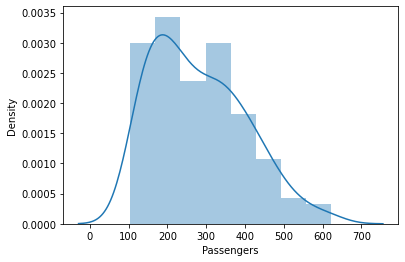

In [7]:
sns.distplot(df['Passengers']);

In [8]:
df['Passengers'].skew()

0.5831604861560892

In [9]:
import plotly.graph_objects as go

fig = go.Figure([go.Scatter(name='true', x=df['Date'], y=df['Passengers'])])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

### **Stationarity**

**Hypothesis of adfuller test:**

Ho: Data is not stationary.

Ha: Data is stationary.

In [10]:
adf = adfuller(df['Passengers'])
adf

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [11]:
adf = adfuller(df['Passengers'])
alpha = 0.05

if adf[1] <= alpha:
    print('Reject null hypothesis; The data is stationary')
else:
    print('Fail to reject null hypothesis; The data is not stationary')

Fail to reject null hypothesis; The data is not stationary


In [12]:
df_stationary = df.copy()

In [13]:
df_stationary['Passengers_Stationary'] = df_stationary['Passengers'].diff()
df_stationary['Passengers_Stationary_2'] = df_stationary['Passengers'].diff().diff()

In [14]:
df_stationary

,Date,Passengers,Passengers_Stationary,Passengers_Stationary_2
0,1949-01-01,112,NaN,NaN
1,1949-02-01,118,6.0,NaN
2,1949-03-01,132,14.0,8.0
3,1949-04-01,129,-3.0,-17.0
4,1949-05-01,121,-8.0,-5.0
...,...,...,...,...
139,1960-08-01,606,-16.0,-103.0
140,1960-09-01,508,-98.0,-82.0
141,1960-10-01,461,-47.0,51.0
142,1960-11-01,390,-71.0,-24.0


In [15]:
df_stationary = df_stationary.dropna()

In [16]:
df_stationary

,Date,Passengers,Passengers_Stationary,Passengers_Stationary_2
2,1949-03-01,132,14.0,8.0
3,1949-04-01,129,-3.0,-17.0
4,1949-05-01,121,-8.0,-5.0
5,1949-06-01,135,14.0,22.0
6,1949-07-01,148,13.0,-1.0
...,...,...,...,...
139,1960-08-01,606,-16.0,-103.0
140,1960-09-01,508,-98.0,-82.0
141,1960-10-01,461,-47.0,51.0
142,1960-11-01,390,-71.0,-24.0


In [17]:
adf_stat = adfuller(df_stationary['Passengers_Stationary'])
alpha = 0.05

if adf_stat[1] <= alpha:
    print('Reject null hypothesis; The data is stationary')
else:
    print('Fail to reject null hypothesis; The data is not stationary')

Fail to reject null hypothesis; The data is not stationary


In [18]:
adf_stat = adfuller(df_stationary['Passengers_Stationary_2'])
alpha = 0.05

if adf_stat[1] <= alpha:
    print('Reject null hypothesis; The data is stationary')
else:
    print('Fail to reject null hypothesis; The data is not stationary')

Reject null hypothesis; The data is stationary


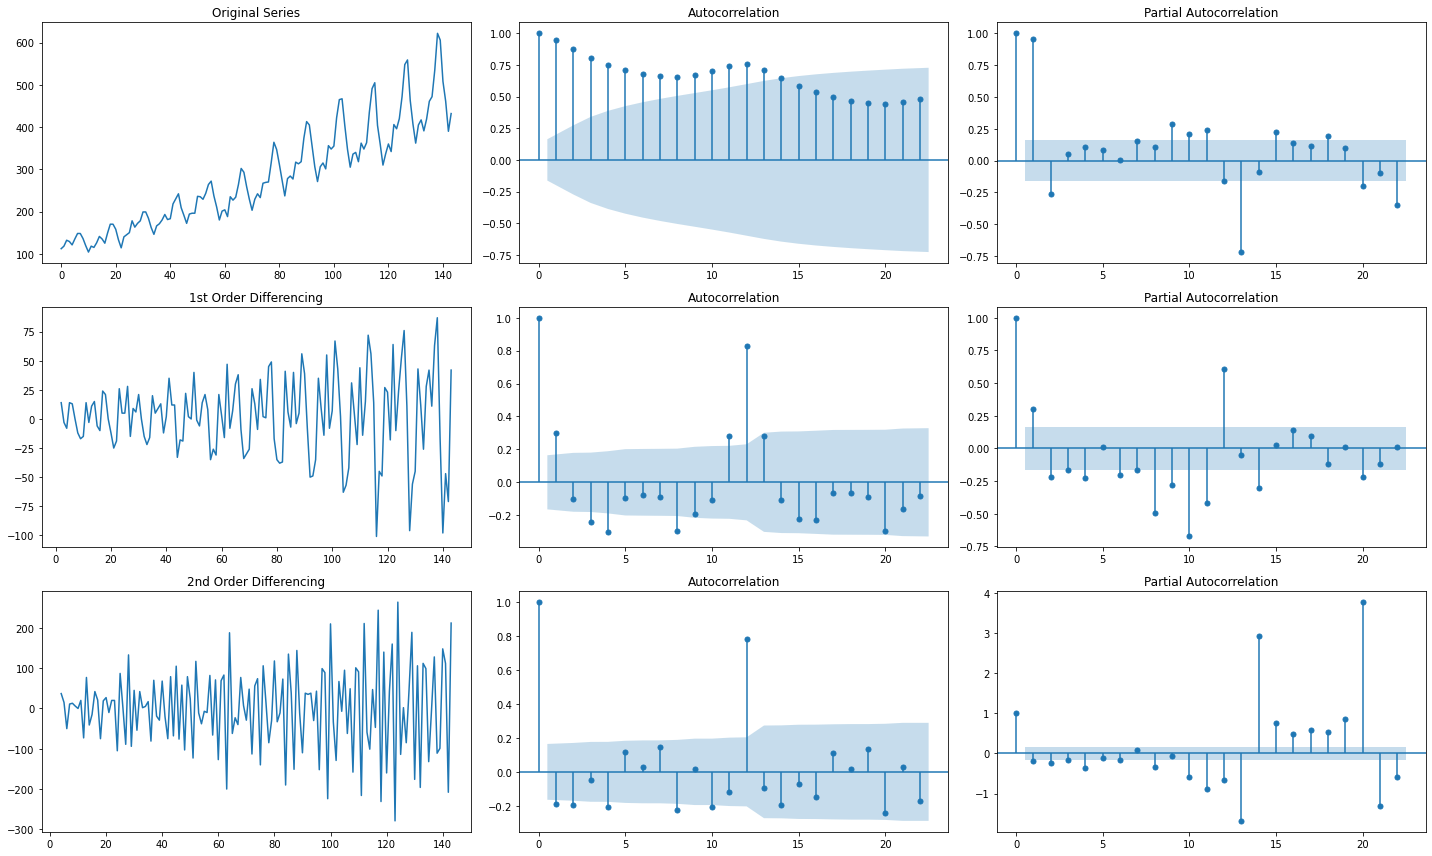

In [19]:
# Original Series
fig, axes = plt.subplots(3, 3, figsize = (20,12))
axes[0, 0].plot(df['Passengers']); axes[0, 0].set_title('Original Series')
plot_acf(df['Passengers'], ax=axes[0, 1])
plot_pacf(df['Passengers'], ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(df_stationary['Passengers_Stationary']); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_stationary['Passengers_Stationary'], ax=axes[1, 1])
plot_pacf(df_stationary['Passengers_Stationary'], ax=axes[1, 2])

# 2nd Differencing
axes[2, 0].plot(df_stationary['Passengers_Stationary_2'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_stationary['Passengers_Stationary_2'], ax=axes[2, 1])
plot_pacf(df_stationary['Passengers_Stationary_2'], ax=axes[2, 2])

plt.tight_layout()
plt.show()

`Autoarima`

In [22]:
import pmdarima as pmd

autoarima_model = pmd.auto_arima(
    df_stationary['Passengers_Stationary_2'], d=2,
    start_p=1,
    start_q=1, trace=True,
)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1700.456, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1631.423, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1574.486, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=1564.534, Time=0.07 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=1542.021, Time=0.10 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=1535.664, Time=0.14 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=1537.612, Time=0.22 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 1.343 seconds


### **Modeling**

`- Older version: statsmodels.tsa.arima_model --> ARIMA`

`- The newest version: statsmodels.tsa.arima.model --> SARIMAX`

`The following is an older version result`

In [44]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df['Passengers'], order = (2, 2, 0))
model_fit = model.fit()

In [45]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D2.Passengers   No. Observations:                  142
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -717.039
Method:                       css-mle   S.D. of innovations             37.714
Date:                Wed, 13 Apr 2022   AIC                           1442.078
Time:                        15:27:48   BIC                           1453.901
Sample:                             2   HQIC                          1446.882
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0174      2.115      0.008      0.993      -4.128       4.162
ar.L1.D2.Passengers    -0.2494      0.083     -2.991      0.003      -0.413      -0.086
ar.L2.D2.Passeng

In [68]:
model2 = ARIMA(df['Passengers'], order = (4, 2, 2))
model2_fit = model2.fit()
print(model2_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D2.Passengers   No. Observations:                  143
Model:                 ARIMA(4, 2, 2)   Log Likelihood                -687.923
Method:                       css-mle   S.D. of innovations             29.094
Date:                Wed, 13 Apr 2022   AIC                           1391.847
Time:                        15:47:01   BIC                           1415.550
Sample:                             2   HQIC                          1401.479
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0105      0.056      0.185      0.853      -0.100       0.121
ar.L1.D2.Passengers    -0.4079      0.108     -3.791      0.000      -0.619      -0.197
ar.L2.D2.Passeng

### **Forecasting**

In [47]:
forecast_length = 12
forecast_result = model2_fit.forecast(forecast_length)

In [48]:
print('Forecasted Value', forecast_result[0], '\n')
print('Forecasted SE', forecast_result[1], '\n')
print('Forecasted confidence interval', forecast_result[2])

Forecasted Value [496.07703405 508.46767299 527.27033699 498.99255958 493.6394315
 492.91241123 498.97171012 513.39972311 516.09631322 520.98306296
 520.49407893 521.96733138] 

Forecasted SE [ 29.19616608  50.4716601   62.87754317  71.19391385  74.71470267
  78.36537016  82.22028774  86.86637684  91.95745014  96.37513511
 100.47343088 104.04551943] 

Forecasted confidence interval [[438.85360006 553.30046805]
 [409.54503697 607.39030902]
 [404.03261695 650.50805703]
 [359.45505251 638.53006665]
 [347.20130515 640.07755785]
 [339.31910808 646.50571438]
 [337.82290736 660.12051288]
 [343.14475303 683.65469319]
 [335.86302282 696.32960361]
 [332.09126914 709.87485677]
 [323.569773   717.41838486]
 [318.04186053 725.89280222]]


In [49]:
df.tail(13)

,Date,Passengers
131,1959-12-01,405
132,1960-01-01,417
133,1960-02-01,391
134,1960-03-01,419
135,1960-04-01,461
136,1960-05-01,472
137,1960-06-01,535
138,1960-07-01,622
139,1960-08-01,606
140,1960-09-01,508


In [50]:
Month = []

for i in range(1, forecast_length+1):
  Month.append('1961-'+str(i)+'-01')

In [51]:
df_forecast = pd.DataFrame({
    'Date': Month,
    'Passengers': forecast_result[0],
})

In [52]:
df_forecast['SE'] = forecast_result[1]
df_forecast['Lower Bound'] = forecast_result[2][:,0]
df_forecast['Upper Bound'] = forecast_result[2][:,1]
df_forecast

,Date,Passengers,SE,Lower Bound,Upper Bound
0,1961-1-01,496.077034,29.196166,438.853600,553.300468
1,1961-2-01,508.467673,50.471660,409.545037,607.390309
2,1961-3-01,527.270337,62.877543,404.032617,650.508057
3,1961-4-01,498.992560,71.193914,359.455053,638.530067
4,1961-5-01,493.639431,74.714703,347.201305,640.077558
5,1961-6-01,492.912411,78.365370,339.319108,646.505714
6,1961-7-01,498.971710,82.220288,337.822907,660.120513
7,1961-8-01,513.399723,86.866377,343.144753,683.654693
8,1961-9-01,516.096313,91.957450,335.863023,696.329604
9,1961-10-01,520.983063,96.375135,332.091269,709.874857


In [53]:
df_forecast.iloc[:12,:][['Date', 'Passengers']]

,Date,Passengers
0,1961-1-01,496.077034
1,1961-2-01,508.467673
2,1961-3-01,527.270337
3,1961-4-01,498.992560
4,1961-5-01,493.639431
5,1961-6-01,492.912411
6,1961-7-01,498.971710
7,1961-8-01,513.399723
8,1961-9-01,516.096313
9,1961-10-01,520.983063


In [54]:
df_forecast.iloc[:1,:][['Date', 'Passengers']]

,Date,Passengers
0,1961-1-01,496.077034


In [55]:
df = df.append(df_forecast.iloc[:1,:][['Date', 'Passengers']])

In [56]:
df_merged = df
df_merged = df_merged.append(df_forecast.iloc[:12,:][['Date', 'Passengers']], ignore_index=True)
df_merged.tail(24)

,Date,Passengers
133,1960-02-01,391.000000
134,1960-03-01,419.000000
135,1960-04-01,461.000000
136,1960-05-01,472.000000
137,1960-06-01,535.000000
138,1960-07-01,622.000000
139,1960-08-01,606.000000
140,1960-09-01,508.000000
141,1960-10-01,461.000000
142,1960-11-01,390.000000


In [57]:
fig = go.Figure([go.Scatter(name='Actual', x=df['Date'], y=df['Passengers'])])
fig.add_trace(go.Scatter(name='Forecast', x=df_forecast['Date'], y=df_forecast['Passengers']))
fig.add_trace(go.Scatter(name='Lower Bound', x=df_forecast['Date'], y=df_forecast['Lower Bound']))
fig.add_trace(go.Scatter(name='Upper Bound', x=df_forecast['Date'], y=df_forecast['Upper Bound']))

fig.update_xaxes(rangeslider_visible = True)
fig.show()

**arima_model (ARIMA) vs arima.model (SARIMAX)**

https://github.com/statsmodels/statsmodels/issues/3884

https://medium.com/swlh/a-brief-introduction-to-arima-and-sarima-modeling-in-python-87a58d375def

**AUTOARIMA**

https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

**ARIMAX**

https://pyflux.readthedocs.io/en/latest/arimax.html